# <font color= 'blue'>Intro to Machine Learning
# <font color='blue'> Python Assignment </font>

## <font color= 'blue'> Taylor's Formula: Practicing Python functionality & coding
Mehek Niwas || MTH 4224 Spring 2024

# <font color='blue'> Problem 1 </font>
*Derive formulas for $f^{(n)}(0)$ for $e^x$ and $\frac{1}{1-x}$, and $f^{(n)}\left(\frac{\pi}{2}\right)$ for $\sin\left(x-\frac{\pi}{2}\right)$*

In [ ]:
from skimage import io
# function to show images using image path
def showImg(img_path):
  img = io.imread(img_path)
  fig = io.imshow(img)
  fig.axes.get_xaxis().set_visible(False)
  fig.axes.get_yaxis().set_visible(False)

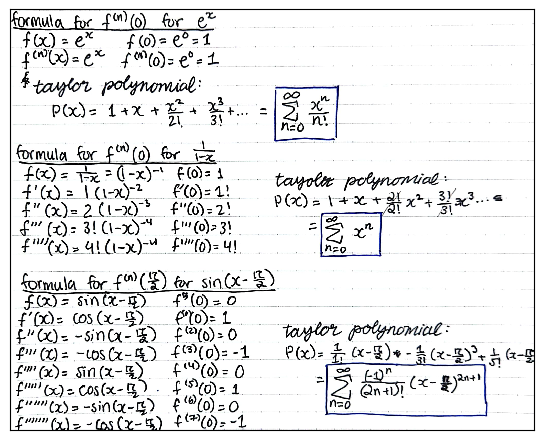

In [ ]:
img_path = "/content/taylor polynomial handwritten.jpeg"
showImg(img_path)

# can also do: --> (produces magnified display of image)
# from IPython import display
# display.Image(image_path)

# <font color='blue'> Problem 2 </font>
*Write a Python function that outputs a Taylor polynomial of degree `n` centered at `x=c`. The a function should take 5 inputs:*
- *a function `f` and a function `f^(n)`*
- *degree `n` you want*
- *number `c` for where the polynomial is centered*
- *number `x` for where you want to compute it*

*Demonstrate your Python function runs for $e^x$ and $\frac{1}{1-x}$ centered at 0, and $\sin\left(x-\frac{\pi}{2}\right)$ centered at $\pi/2$. Show it works for a variety of $x$ and $n$ inputs*

In [ ]:
import math
import numpy as np

# f_n functions for example problems. replace x with c, y with n in taylorPoly function
e = lambda x, y: math.exp(x) # not dependent on y/n for c=0
oneX = lambda x, y: math.factorial(y)
sinX = lambda x, y: pow((-1), ((2*y)+1)) * (y % 2)

def taylorPoly(f_n, x, c, n):
  sum = 0
  for i in range(n+1): # i is the nth number (including 0)
    sum += ((f_n(c, i)/math.factorial(i)) * pow((x-c), i))

  return sum

In [ ]:
print("For e^x, centered at 0:")
sum = taylorPoly(e, 1, 0, 2)
print(sum); print()

print("For sin(x-pi/2), centered at 0:")
sum = taylorPoly(sinX, 1, (np.pi/2), 2)
print(sum); print()

print("For 1/(1-x), centered at 0:")
sum = taylorPoly(oneX, 1, 0, 2)
print(sum); print()

For e^x, centered at 0
2.5

For sin(x-pi/2), centered at 0
0.5707963267948966

For 1/(1-x), centered at 0
3.0



# <font color='blue'> Problem 3 </font>
*Derive a numerical upper bound for the remainder term $\max\limits_{t\in(c,x)}\left|\frac{f^{(n+1)}(t)}{n!}(x-t)^n(x-c)\right|$ for $f(x)=e^x$ with $c=0$; for $\frac{1}{1-x}$ with $c=0$; and for $\sin\left(x-\frac{\pi}{2}\right)$ with $c=\frac{\pi}{2}$.*

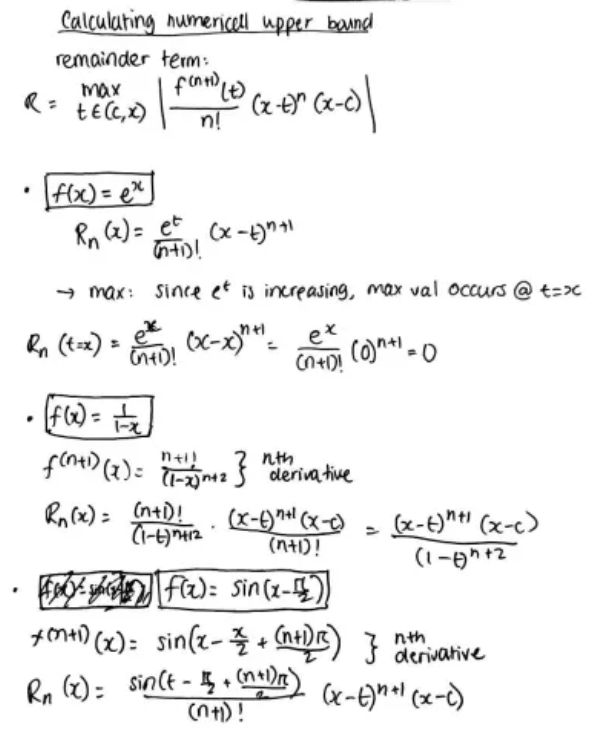

In [ ]:
img_path = "/content/problem 3 handwritten.png"
from IPython import display
display.Image(img_path)

# <font color='blue'> Problem 4 </font>
*Write a Python function that computes a Taylor polynomial up to whatever degree ensures the error is bounded by $\varepsilon$ as per Taylor's Theorem. $\varepsilon$ will be an additional input to the function but $n$ will not be an input*

*Demonstrate your Python function runs for  $e^x$ and $\frac{1}{1-x}$ centered at 0 and $\sin\left(x-\frac{\pi}{2}\right)$ centered at $\pi/2$. Show it works for a variety of $x$ and $\varepsilon$ inputs.*

In [ ]:
import numpy as np
import math

def taylor_polynomial(func, center, epsilon, eval_point, max_degree=10):
    degree = 0
    error = float('inf')

    while error > epsilon and degree <= max_degree:
        # Compute the Taylor polynomial coefficients
        coeffz = [func(center)]
        for k in range(1, degree + 1):
            coeffz.append(func(center + k) / np.math.factorial(k))

        # taylor poly calculation
        taylor_calculated = np.sum(c * (eval_point - center)**k for k, c in enumerate(coeffz))

        # error calc
        error = abs(func(eval_point) - taylor_calculated)

        # update degree
        degree += 1

    return taylor_calculated, degree - 1  # return taylor poly & degree


In [ ]:
e = lambda x: np.exp(x)
oneX = lambda x: 1 if x == 1 else 1 / (1 - x) # had to handle division by 0 case
sinX = lambda x: np.sin(x - (np.pi / 2))

x_values = [1, 2, 3]
epsilon_list = [0.1, 0.01, 0.001]

print("Taylor Polynomial Calculations: ")
print("")
for x_val in x_values:
  for curr_epsilon in epsilon_list:
    print(f"x = {x_val} & epsilon = {curr_epsilon}:")
    result, degree = taylor_polynomial(e, 0, curr_epsilon, x_val)
    print("e^(x):", result, " deg =", degree)

    result, degree = taylor_polynomial(oneX, 0, curr_epsilon, x_val)
    if result == float('inf'):
        print("undefined")
    else:
        print("1/(1-x):", result, " deg =", degree)

    result, degree = taylor_polynomial(sinX, math.pi / 2, curr_epsilon, x_val)
    print("sin(x-pi/2):", result, " deg =", degree)
    print()

Taylor Polynomial Calculations: 
x = 1 & epsilon = 0.1:
e^(x): 15.15233464219725  deg = 10
1/(1-x): 1.0  deg = 0
sin(x-pi/2): -0.4803085472328315  deg = 1

x = 1 & epsilon = 0.01:
e^(x): 15.15233464219725  deg = 10
1/(1-x): 1.0  deg = 0
sin(x-pi/2): -0.339433031445697  deg = 10

x = 1 & epsilon = 0.001:
e^(x): 15.15233464219725  deg = 10
1/(1-x): 1.0  deg = 0
sin(x-pi/2): -0.339433031445697  deg = 10

x = 2 & epsilon = 0.1:
e^(x): 224.2575601206546  deg = 10
1/(1-x): 0.021319112006942746  deg = 10
sin(x-pi/2): 0.361162437575065  deg = 1

x = 2 & epsilon = 0.01:
e^(x): 224.2575601206546  deg = 10
1/(1-x): 0.021319112006942746  deg = 10
sin(x-pi/2): 0.44558700519114885  deg = 10

x = 2 & epsilon = 0.001:
e^(x): 224.2575601206546  deg = 10
1/(1-x): 0.021319112006942746  deg = 10
sin(x-pi/2): 0.44558700519114885  deg = 10

x = 3 & epsilon = 0.1:
e^(x): 2784.940781616903  deg = 10
1/(1-x): -0.5  deg = 2
sin(x-pi/2): 2.0194839552645516  deg = 10

x = 3 & epsilon = 0.01:
e^(x): 2784.940781616

<ipython-input-52-49d385658277>:16: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  taylor_calculated = np.sum(c * (eval_point - center)**k for k, c in enumerate(coeffz))
<ipython-input-52-49d385658277>:13: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  coeffz.append(func(center + k) / np.math.factorial(k))


# <font color='blue'> Problem 5 </font>
*Use your code to compute values to make some plots for the following.*

a. *$P_{n,0,e^x}(x)$ on $[-5, 5]$ for $n=0, 1, 2, 3, 5, 10$ along with $f(x)=e^x$*

b. *$P_{n,0,\frac{1}{1-x}}(x)$ on $[-0.9, 0.9]$ for $n=0, 1, 2, 3, 5, 10$ along with $f(x)=\\frac{1}{1-x}$*

c. *$P_{n,\frac{\pi}{2},\sin\left(x-\frac{\pi}{2}\right)}(x)$ on $\left[-\frac{\pi}{2}, \frac{3\pi}{2}\right]$ for $n=0, 1, 2, 3, 5, 10$ along with $f(x)=\sin\left(x-\frac{\pi}{2}\right)$*

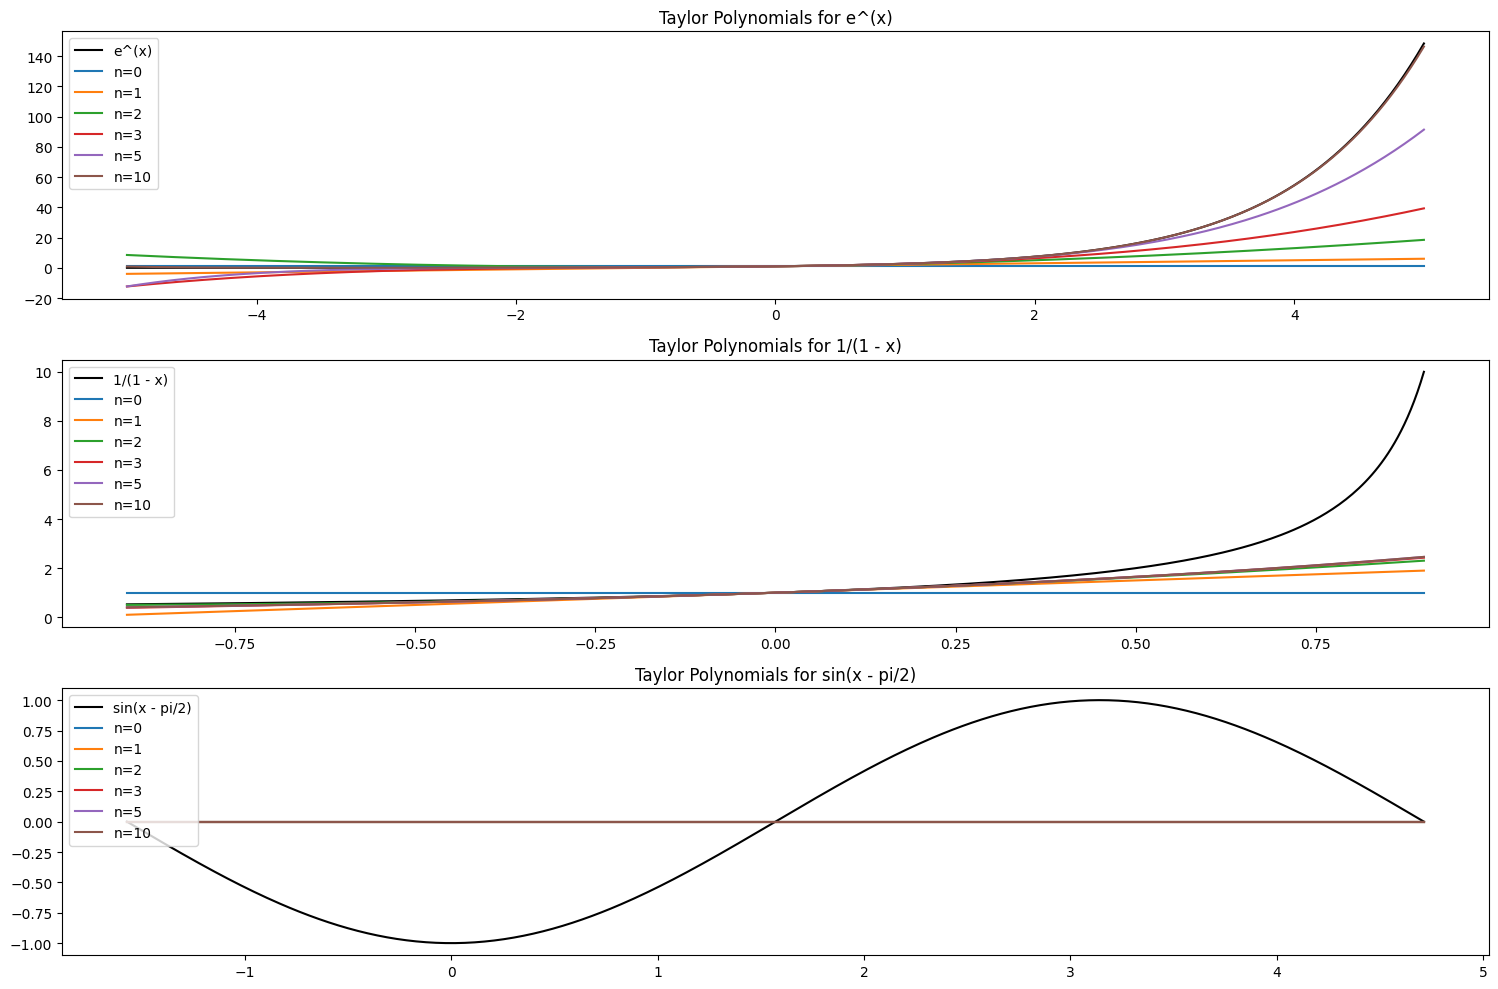

<Figure size 640x480 with 0 Axes>

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

e = lambda x: np.exp(x)
oneX = lambda x: 1 /(1 - x)
sinX = lambda x: np.sin(x - (np.pi / 2))

def taylor_poly(f_n, x, c, n): # wrote better verison of prior code
    taylor_poly_values = np.zeros_like(x)
    for i in range(n + 1):
        taylor_poly_values += (f_n(c) / math.factorial(i)) * (x - c) ** i
    return taylor_poly_values

# x range
e_range = np.linspace(-5, 5, 400)
one_range = np.linspace(-0.9, 0.9, 400)
sin_range = np.linspace(-np.pi / 2, 3 * np.pi / 2, 400)

# taylor poly deges.
degrees = [0, 1, 2, 3, 5, 10]

plt.figure(figsize=(15, 10))

# f(x) = exp(x)
plt.subplot(3, 1, 1)
plt.plot(e_range, e(e_range), label='e^(x)', color='black')
for degree in degrees:
    plt.plot(e_range, taylor_poly(e, e_range, 0, degree), label=f'n={degree}')
plt.title('Taylor Polynomials for e^(x)')
plt.legend()

# f(x) = 1 / (1 - x)
plt.subplot(3, 1, 2)
plt.plot(one_range, oneX(one_range), label='1/(1 - x)', color='black')
for degree in degrees:
    plt.plot(one_range, taylor_poly(oneX, one_range, 0, degree), label=f'n={degree}')
plt.title('Taylor Polynomials for 1/(1 - x)')
plt.legend()

# f(x) = sin(x - pi/2)
plt.subplot(3, 1, 3)
plt.plot(sin_range, sinX(sin_range), label='sin(x - pi/2)', color='black')
for degree in degrees:
    plt.plot(sin_range, taylor_poly(sinX, sin_range, np.pi / 2, degree), label=f'n={degree}')
plt.title('Taylor Polynomials for sin(x - pi/2)')
plt.legend()

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()
